In [56]:
# import pandas
# csvFile = pandas.read_csv('pendulum.csv')

import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import math
import csv
from matplotlib import rc, rcParams

print(plt.style.available)

plt.style.use('classic')
plt.style.use('seaborn-v0_8-whitegrid')

rc("text.latex",preamble=r'usepackage{cmbright}')

rcParams['font.family']='sans-serif'
rcParams['font.sans-serif']=['Times New Roman']

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


15.7
mean of given gs:  9.829587812628807
std of given gs:  0.6943804308649695


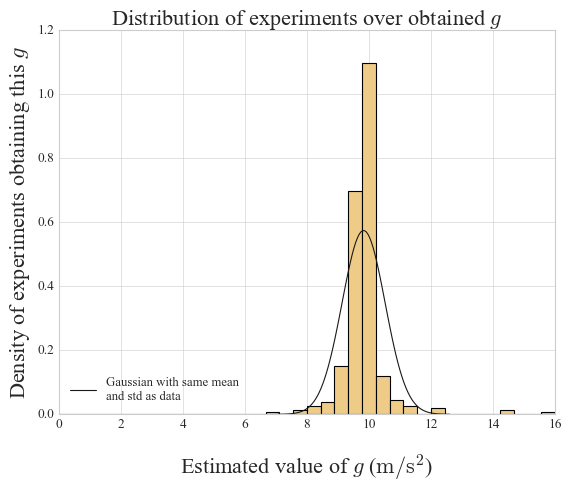

In [57]:
## one of them is 978 so take it out because we don't know how to deal with the standard error

with open('pendulum.csv', mode ='r') as file:    
       # csvFile = csv.reader(file)
       csvFile = csv.DictReader(file)
       lines = [line for line in csvFile]
lines.pop(4)

means = [float(line['g (m/s2)']) for line in lines]
# means = [float(line[1]) for line in lines]
print(max(means))

## change percents into values
lines[246 - 1]["stat uncert"] = 0.02 * means[246]
lines[246 - 1]["sys uncert"] = 0.015 * means[246]
## change unbalanced values into usable symmetric uncertainty (we care about range i guess and not actual start/end values here)
lines[0]["sys uncert"] = (0.35 + 0.44)/2
lines[133 - 1]["stat uncert"] = (0.0484 + 0.00196)/2
lines[219 - 1]["total uncert"] = (0.14 + 0.37)/2

mean = np.mean(means)
std = np.std(means)

print("mean of given gs: ", mean)
print("std of given gs: ", std)

mu = mean
variance = std**2
sigma = math.sqrt(variance)
x = np.linspace(mu - 4*sigma, mu + 4*sigma, 100)
plt.plot(x, stats.norm.pdf(x, mu, sigma), color=np.array([25,25,25]) / 255, label = 'Gaussian with same mean\nand std as data')
plt.hist(means, 36, range=(0, 16), color=np.array([238,204,136]) / 255, density=True)

plt.xlabel(r'Estimated value of $g$ ($\text{m}/\text{s}^2$)', fontsize=20, labelpad=20)
plt.ylabel(r'Density of experiments obtaining this $g$', fontsize=20)
plt.title("Distribution of experiments over obtained $g$", fontsize=20)

plt.legend(loc="lower left",fontsize=11.5,ncol = 2)

plt.show() 

In [104]:
# line[]
sysdev = [float(line['sys uncert']) if line['sys uncert'] != '' else 0 for line in lines]

statdev = [float(line['stat uncert']) if line['stat uncert'] != '' else 0 for line in lines]

firsttotdev = [float(line['total uncert']) if line['total uncert'] != '' else 0 for line in lines]

# print(f"{len(means)} {len(sysdev)} {len(statdev)} {len(totdev)}")

print(' '.join([str(j) if i == 0 else '' for j, i in enumerate(totdev)]))
totdev = [math.sqrt(sysdev[i]**2 + statdev[i]**2) if tot == 0 else tot for (i, tot) in enumerate(firsttotdev)]
print(' '.join([str(j) if i == 0 else '' for j, i in enumerate(totdev)]))
totdev
print(' '.join([str(j) if i == 0 else '' for j, i in enumerate(totdev)]))

# okay it turns out some measurements really don't have uncertainty, so we can't use them for any better calculations
# print(line[]['label'])

naivedev = math.sqrt(sum([tot**2 for tot in totdev]) / len(totdev))
print(naivedev)

bestmean = sum([mean / totdev[i]**2 if totdev[i]!=0 else 0 for i, mean in enumerate(means)])/sum([1/tot**2 if tot != 0 else 0 for tot in totdev])
print(bestmean)

bestdev = len([1 for tot in totdev if tot != 0])/sum([1/tot**2 if tot != 0 else 0 for tot in totdev])
bestdev
print(sum([1/tot**2 if tot != 0 else 0 for tot in totdev]))
trial = [(j, i) for j, i in enumerate(totdev) if i != 0]
trial.remove((192, 2.5e-05))
print(min(trial, key = lambda t: t[1]))
print(firsttotdev[192], means[192])
print(len([1 for tot in trial])/sum([1/tot[1]**2 for tot in trial]))
print(sum([means[i] / tot**2 for i, tot in trial])/sum([1/tot**2 for i, tot in trial]))

                                                       55              69 70                                                                                                                            194                                                                                                                                                                      
                                                       55              69 70                                                                                                                            194                                                                                                                                                                      
                                                       55              69 70                                                                                                                            194                                                         